In [75]:
import geopandas as gpd
import plotly.express as px
import pandas as pd

In [83]:
dc_bound = gpd.read_file("neighbourhoods.geojson")
df = pd.read_csv("cleaned_data.csv")

In [90]:
dc_bound.head()

neighbourhood neighbourhood_group  \
0   Congress Heights, Bellevue, Washington Highlands                None   
1                           Douglas, Shipley Terrace                None   
2  Woodland/Fort Stanton, Garfield Heights, Knox ...                None   
3                          Near Southeast, Navy Yard                None   
4      River Terrace, Benning, Greenway, Dupont Park                None   

                                            geometry  \
0  MULTIPOLYGON (((-77.01389 38.82865, -77.01386 ...   
1  MULTIPOLYGON (((-76.99291 38.85391, -76.99231 ...   
2  MULTIPOLYGON (((-76.97714 38.85728, -76.97721 ...   
3  MULTIPOLYGON (((-76.97936 38.87756, -76.97937 ...   
4  MULTIPOLYGON (((-76.93760 38.88996, -76.93752 ...   

                              neighbourhood_cleansed  
0   Congress Heights, Bellevue, Washington Highlands  
1                           Douglas, Shipley Terrace  
2  Woodland/Fort Stanton, Garfield Heights, Knox ...  
3                          Near Southeast, Navy Yard  
4      River Terrace, Benning, Greenway, Dupont Park

## Geo plot

In [93]:
# get average rating
specified_review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

# Calculate the average review score across the specified columns
df['average_review_score'] = df[specified_review_score_columns].mean(axis=1)

# create a new data frame
neighbourhood_data = df.groupby('neighbourhood_cleansed').agg({
    'price_num': 'mean',
    'average_review_score':'mean'
}).reset_index()
neighbourhood_data['neighbourhood_cleansed'] = neighbourhood_data['neighbourhood_cleansed'].str.split(',').str[0]
neighbourhood_data.head()


neighbourhood_cleansed   price_num  average_review_score
0        Brightwood Park  128.251479              4.742062
1              Brookland  136.564516              4.804553
2           Capitol Hill  167.705341              4.850199
3           Capitol View  172.627451              4.741624
4      Cathedral Heights  224.983871              4.830465

In [95]:
dc_bound['neighbourhood_cleansed'] = dc_bound['neighbourhood']

dc_bound['neighbourhood_cleansed'] = dc_bound['neighbourhood_cleansed'].str.split(',').str[0]
merged_gdf = dc_bound.merge(neighbourhood_data, on='neighbourhood_cleansed', how='right')
merged_gdf['neighbourhood_cleansed'] = merged_gdf['neighbourhood_cleansed'].str.split(',').str[0]

merged_gdf.head()

neighbourhood neighbourhood_group  \
0             Brightwood Park, Crestwood, Petworth                None   
1                    Brookland, Brentwood, Langdon                None   
2                       Capitol Hill, Lincoln Park                None   
3  Capitol View, Marshall Heights, Benning Heights                None   
4   Cathedral Heights, McLean Gardens, Glover Park                None   

                                            geometry neighbourhood_cleansed  \
0  MULTIPOLYGON (((-77.01904 38.93741, -77.01964 ...        Brightwood Park   
1  MULTIPOLYGON (((-76.99647 38.92051, -76.99641 ...              Brookland   
2  MULTIPOLYGON (((-77.00909 38.88167, -77.00907 ...           Capitol Hill   
3  MULTIPOLYGON (((-76.93291 38.89263, -76.93158 ...           Capitol View   
4  MULTIPOLYGON (((-77.07651 38.94222, -77.07636 ...      Cathedral Heights   

    price_num  average_review_score  
0  128.251479              4.742062  
1  136.564516              4.804553  
2  167.705341              4.850199  
3  172.627451              4.741624  
4  224.983871              4.830465

In [96]:
import json
import matplotlib.pyplot as plt
geojson_dict = json.loads(dc_bound.to_json())
geojson_dict['features'][0]['properties']

{'neighbourhood': 'Congress Heights, Bellevue, Washington Highlands',
 'neighbourhood_group': None,
 'neighbourhood_cleansed': 'Congress Heights'}

# Plot for Average Airbnb Price and Review by Neighborhood in DC

In [156]:
import plotly.express as px

# Assuming 'merged_gdf' and 'geojson_dict' are already defined and prepared as shown in the previous steps.

# Create the choropleth map
fig = px.choropleth_mapbox(
    merged_gdf,
    geojson=geojson_dict,
    locations='neighbourhood_cleansed',  
    featureidkey='properties.neighbourhood_cleansed',  
    color='price_num',  
    color_continuous_scale="tealrose",  
    mapbox_style="carto-positron",  
    zoom=10,  
    center={"lat": 38.9, "lon": -77.03}, 
    opacity=0.5,  
    labels={'neighbourhood_cleansed':'Area','price_num': 'Average Price'}, 
    hover_data={
        'neighbourhood_cleansed': True,
        'price_num': ':.2f'
    }
)
fig.update_traces(
    hovertemplate=(
        "<b>%{customdata[0]}</b><br>"
        "<span style='font-size:0.9em;'>Average Price:</span> "
        "<span style='font-size:0.9em;'><b>$%{customdata[1]:.2f}</b></span><br>"
    )
)
fig.update_layout(
    hoverlabel=dict(
        font=dict(
            family="Courier New, monospace",
            size=12
        ),
        bordercolor='pink',
        bgcolor='white'
    ),
    title='Average Airbnb Price and Review by Neighborhood in DC',
    margin={"r":0,"t":0,"l":0,"b":0},
    clickmode='event+select'
)

fig.show()


In [159]:
import plotly.express as px

# Assuming 'merged_gdf' and 'geojson_dict' are already defined and prepared as shown in the previous steps.

# Create the choropleth map
fig = px.choropleth_mapbox(
    merged_gdf,
    geojson=geojson_dict,
    locations='neighbourhood_cleansed',  
    featureidkey='properties.neighbourhood_cleansed',  
    color='average_review_score',  
    color_continuous_scale="tealrose",  
    mapbox_style="carto-positron",  
    zoom=10,  
    center={"lat": 38.9, "lon": -77.03}, 
    opacity=0.5,  
    labels={'neighbourhood_cleansed':'Area','average_review_score': 'Average Rating'}, 
    hover_data={
        'neighbourhood_cleansed': True,
        'average_review_score': ':.2f'
    }
)
fig.update_traces(
    hovertemplate=(
        "<b>%{customdata[0]}</b><br>"
        "<span style='font-size:0.9em;'>Average Rating:</span> "
        "<span style='font-size:0.9em;'><b>$%{customdata[1]:.2f}</b></span><br>"
    )
)
fig.update_layout(
    hoverlabel=dict(
        font=dict(
            family="Courier New, monospace",
            size=12
        ),
        bordercolor='pink',
        bgcolor='white'
    ),
    title='Average Airbnb Price and Review by Neighborhood in DC',
    margin={"r":0,"t":0,"l":0,"b":0},
    clickmode='event+select'
)

fig.show()


In [171]:
import plotly.graph_objects as go

# Assuming 'merged_gdf' and 'geojson_dict' are already defined as shown in previous steps.

# Create base figure with map settings
fig = go.Figure(go.Choroplethmapbox(
    geojson=geojson_dict,
    locations=merged_gdf['neighbourhood_cleansed'],  
    featureidkey='properties.neighbourhood_cleansed',  
    z=merged_gdf['average_review_score'],  # initial z values, can be changed by dropdown
    colorscale="tealrose",
    marker_opacity=0.5,
    marker_line_width=0,
    hoverinfo='all'
))

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=10,
    mapbox_center={"lat": 38.9, "lon": -77.03},
    margin={"r":0,"t":0,"l":0,"b":0},
    title='Average Airbnb Metrics by Neighborhood in DC'
)

fig.update_layout(
    hoverlabel=dict(
        font=dict(
            family="Courier New, monospace",
            size=12
        ),
        bordercolor='pink',
        bgcolor='white'
    ),
    clickmode='event+select'
)

#  dropdown buttons
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="Average Review Score",
                     method="update",
                     args=[{"z": [merged_gdf['average_review_score']]},
                           {"title": "Average Airbnb Review Score by Neighborhood in DC"}]),
                dict(label="Average Price",
                     method="update",
                     args=[{"z": [merged_gdf['price_num']]},
                           {"title": "Average Airbnb Price by Neighborhood in DC"}]),
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.9,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

fig.update_traces(
    hovertemplate=(
        "<b>%{location}</b><br>" +
        "<span style='font-size:0.9em;'>Value:</span> " +
        "<span style='font-size:0.9em;'><b>%{z:.2f}</b></span><br>"
    )
)

fig.show()


## Population 

In [151]:
# df with only the top ten

df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].str.split(',').str[0]
neighbourhood_taken_60_sum = df.groupby('neighbourhood_cleansed')['taken_60'].sum().sort_values(ascending=False)

top_ten_neighbourhoods = neighbourhood_taken_60_sum.head(10)
names_only = top_ten_neighbourhoods.index
top_neighbourhoods = list(names_only)
df_withtop_10 = df[df['neighbourhood_cleansed'].isin(top_neighbourhoods)]


In [152]:
# Grouping data by 'neighbourhood_cleansed' and calculating mean for price, latitude, and longitude
data_for_pop = df_withtop_10.groupby('neighbourhood_cleansed').agg({
    'price_num': 'mean',
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

data_for_pop.head()

neighbourhood_cleansed   price_num   latitude  longitude
0        Brightwood Park  128.251479  38.946651 -77.024605
1           Capitol Hill  167.705341  38.885254 -76.993280
2       Columbia Heights  147.474614  38.929595 -77.029757
3          Dupont Circle  438.818627  38.911680 -77.041327
4               Edgewood  152.004386  38.915817 -77.009190

In [153]:
dc_wards = gpd.read_file("data/ACS_Demographic_Characteristics_DC_Ward.geojson")[
    ["NAMELSAD", "DP05_0001E", "geometry"]
]

# Plot for Top 10 Neighbourhoods by Total Days Booked in 60 Days

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=neighbourhood_taken_60_sum.head(10).index, y=neighbourhood_taken_60_sum.head(10).values, palette="Blues_d")
plt.title('Top 10 Neighbourhoods by Total Days Booked in 60 Days')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Days Booked')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tight_layout()
plt.show()

<ipython-input-155-5a02be1fb6f3>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




# Plot for the relationship between top 10 booked neighbourhoods and Population Density

In [139]:
import pandas as pd
import folium
import json
from folium import Icon


dc_wards['Population_Density'] = dc_wards['DP05_0001E'] / dc_wards.geometry.area
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12, tiles='cartodbpositron')  # Changed tiles here

choropleth = folium.Choropleth(
    geo_data=dc_wards,
    data=dc_wards,
    columns=['NAMELSAD', 'Population_Density'],
    key_on='feature.properties.NAMELSAD',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density in DC'
).add_to(m)

neighbourhood_data = df_withtop_10.groupby('neighbourhood_cleansed').agg({
    'price_num': 'mean',
    'average_review_score':'mean',
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()


for index, row in neighbourhood_data.iterrows():
    popup_html = f"""
    <div style="width:200px;">
        <strong>{row['neighbourhood_cleansed']}</strong><br>
        Average price: ${round(row['price_num'], 2)}<br>
        Average rating: {round(row['average_review_score'], 2)}
    </div>
    """
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=folium.Popup(popup_html, max_width=265),
        tooltip=row['neighbourhood_cleansed'],
        icon=Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Display the map
m


<ipython-input-139-8ce22347bd26>:7: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




# Plot for relationship between top 10 booked neighbourhoods and Average Price

In [174]:
import pandas as pd
import plotly.graph_objects as go


fig = px.choropleth_mapbox(
    merged_gdf,
    geojson=geojson_dict,
    locations='neighbourhood_cleansed',  
    featureidkey='properties.neighbourhood_cleansed',  
    color='price_num',  
    color_continuous_scale="tealrose",  
    mapbox_style="carto-positron",  
    zoom=10,  
    center={"lat": 38.9, "lon": -77.03}, 
    opacity=0.5,  
    labels={'neighbourhood_cleansed':'Area','price_num': 'Average Price',}, 
    hover_data={
        'neighbourhood_cleansed': True,
        'price_num': ':.2f',  
    }
)
fig.update_traces(
    hovertemplate=(
        "<b>%{customdata[0]}</b><br>"
        "<span style='font-size:0.9em;'>Average Price:</span> "
        "<span style='font-size:0.9em;'><b>$%{customdata[1]:.2f}</b></span><br>"
    )
)

fig.add_trace(
    go.Scattermapbox(
        lat=neighbourhood_data['latitude'],
        lon=neighbourhood_data['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color='black',
            opacity=0.7
        ),
        text=neighbourhood_data.apply(lambda row: f"{row['neighbourhood_cleansed']}<br>Avg. Price: ${round(row['price_num'], 2)}", axis=1),
        hoverinfo='text'
    )
    
)

fig.update_layout(
    hoverlabel=dict(
        font=dict(family="Courier New, monospace", size=12),
        bordercolor='pink',
        bgcolor='white'
    ),
    title='Average Airbnb Price and Review by Neighborhood in DC',
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    clickmode='event+select'
)

fig.show()


In [173]:
import pandas as pd
import plotly.graph_objects as go

fig = px.choropleth_mapbox(
    merged_gdf,
    geojson=geojson_dict,
    locations='neighbourhood_cleansed',  
    featureidkey='properties.neighbourhood_cleansed',  
    color='average_review_score',  
    color_continuous_scale="tealrose",  
    mapbox_style="carto-positron",  
    zoom=10,  
    center={"lat": 38.9, "lon": -77.03}, 
    opacity=0.5,  
    labels={'neighbourhood_cleansed':'Area','average_review_score':'Average rating'}, 
    hover_data={
        'neighbourhood_cleansed': True,
        'average_review_score': ':.2f'  
    }
)
fig.update_traces(
    hovertemplate=(
        "<b>%{customdata[0]}</b><br>"
        "<span style='font-size:0.9em;'>Average Rating:</span> "
        "<span style='font-size:0.9em;'><b>%{customdata[2]:.2f}</b></span>"
    )
)

fig.add_trace(
    go.Scattermapbox(
        lat=neighbourhood_data['latitude'],
        lon=neighbourhood_data['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color='black',
            opacity=0.7
        ),
        text=neighbourhood_data.apply(lambda row: f"{row['neighbourhood_cleansed']}<br>Avg. Rating: {round(row['average_review_score'], 2)}", axis=1),
        hoverinfo='text'
    )
    
)

fig.update_layout(
    hoverlabel=dict(
        font=dict(family="Courier New, monospace", size=12),
        bordercolor='pink',
        bgcolor='white'
    ),
    title='Average Airbnb Price and Review by Neighborhood in DC',
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    clickmode='event+select'
)

fig.show()


# Word Cloud

In [176]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.corpus import stopwords
import nltk


host_about_text = df['host_about'].dropna()
combined_text = " ".join(host_about_text)

# Removing punctuation
translator = str.maketrans('', '', string.punctuation)
text_no_punctuation = combined_text.translate(translator)
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))
# Manually defining a basic set of English stopwords
# basic_stopwords = set([
#    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
#    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
#    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
#    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
#    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
#    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
#    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
#    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
#    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
#    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
#    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
#    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","washington","dc","you'll"
#])

# Remove basic stopwords
text_no_basic_stopwords = ' '.join([word for word in text_no_punctuation.lower().split() if word not in stop_words])
mask = np.array(Image.open("comment.png"))
# Generate the word cloud with the simplified stopword set
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10,mask=mask).generate(text_no_basic_stopwords)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tongge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<ipython-input-177-9b2cec9ebb0a>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




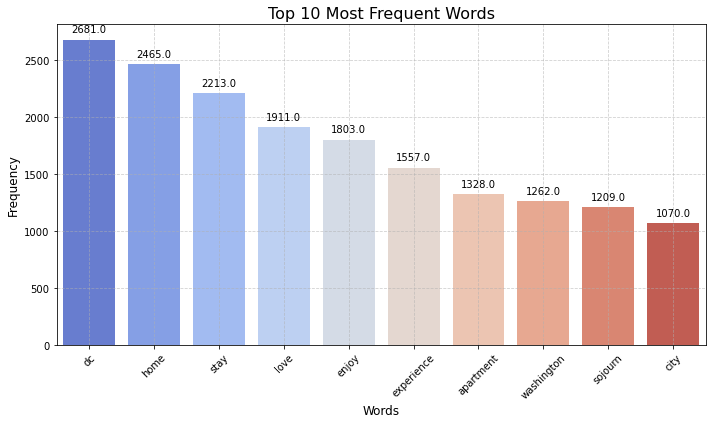

In [177]:
word_counts = Counter(text_no_basic_stopwords.split())
most_common_words = word_counts.most_common(10)

# Data for plotting
words = [word for word, freq in most_common_words]
frequencies = [freq for word, freq in most_common_words]


data_word = pd.DataFrame({
    'Words': words,
    'Frequency': frequencies
})

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Words', y='Frequency', data=data_word, palette="coolwarm")  

plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 10 Most Frequent Words', fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),  # formatting the label to show with one decimal
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.tight_layout()
plt.show()
